In [1]:
from tensorflow.keras.models import load_model
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [2]:
model = load_model('es_func_folder_x3.h5')

In [3]:
def prediction(img_path):
    img = Image.open(img_path).resize((28,28), Image.ANTIALIAS).convert('RGB')
    img = image.img_to_array(img)
    img = img.astype('uint8')
    pred = model.predict(np.expand_dims(img, axis=0))
    return np.argmax(pred)

In [4]:
folder = '/home/a/datasets/mnist_png_160x3/testing/5/' # 99.1%
# folder = '/home/a/datasets/mnist_png/testing/9/' # 97.9%

files = [f for f in os.listdir(folder) if 'png' in f or 'jpg' in f]

3558.png 8


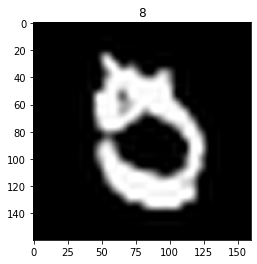

4548.png 3


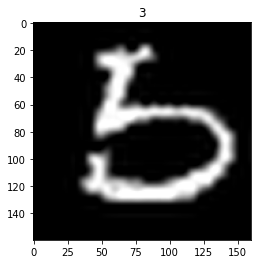

2597.png 3


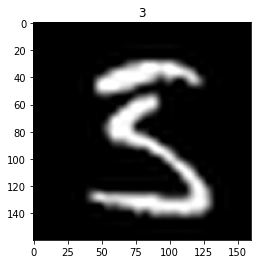

5997.png 9


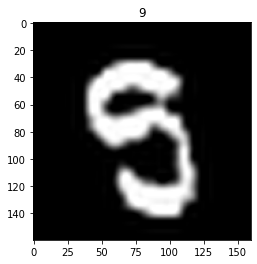

1393.png 3


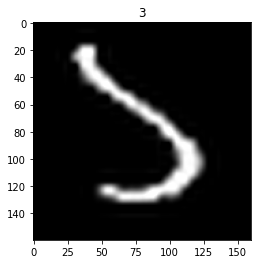

2035.png 3


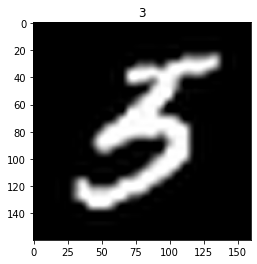

674.png 3


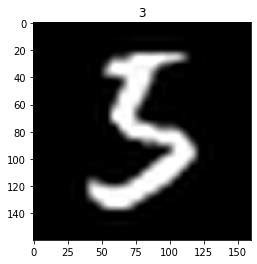

1737.png 3


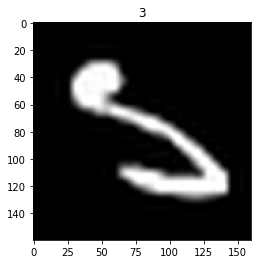

99.10313901345292 %
(array([3, 5, 8, 9]), array([  6, 884,   1,   1]))


In [5]:
preds = []
count = 0
for i in range(0, len(files)):
    res = prediction(os.path.join(folder,files[i]))
    preds.append(res)
    if pathlib.PurePath(folder).name  == str(res):
        count += 1
    else: 
        print(files[i], res)
        plt.imshow(cv2.imread(os.path.join(folder,files[i])))
        plt.title(res)
        plt.show()
print (count / len(files) * 100, '%')   

results = np.array(preds)
print(np.unique(results, return_counts=True))